In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()


# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv('data_files/fcc-forum-pageviews.csv')
df["date"] = pd.to_datetime(df["date"])
df = df.set_index("date")


# Clean the data by filtering out days when the page views were in the top 2.5% of the dataset 
#or bottom 2.5% of the dataset.
df=df[(df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))]


#Create a draw_line_plot function that uses Matplotlib to draw a line chart.. 
#The title should be "Daily freeCodeCamp Forum Page Views 5/2016-12/2019". 
#The label on the x axis should be "Date" and the label on the y axis should be "Page Views".

    
def draw_line_plot():
    # Draw line plot
    fig, ax = plt.subplots(figsize=(20, 8))
    ax.plot(df.index, df['value'], color='red')
        
    ax.set(xlabel="Date",
       ylabel="Page Views",
       title="Daily freeCodeCamp Forum Page Views 5/2016-12/2019")

    # Save image and return fig 
    fig.savefig('images/line_plot.png')
    

# Copy and modify data for monthly bar plot
#It should show average daily page views for each month grouped by year. 
df_bar = df
df_bar['year'] = df_bar.index
df_bar['month'] = df_bar.index
df_bar['year'] = pd.to_datetime(df_bar['year']).dt.year
df_bar['month'] = pd.to_datetime(df_bar['month']).dt.month_name()

df_bar=df_bar[['year','month','value']].reset_index()
df_bar.drop('date', axis=1, inplace=True)  

df_bar=df_bar.groupby(['year','month'], as_index=False).mean()
df_bar['value']=df_bar['value'].astype(int)

df_bar.rename(columns = {'value':'mean'}, inplace = True)

# Draw bar plot
def draw_bar_plot():
    #  The legend should show month labels and have a title of "Months". 
    # On the chart, the label on the x axis should be "Years" 
    #and the label on the y axis should be "Average Page Views".    

    fig = plt.figure(figsize=(20, 8))
    sns.barplot(x='year',
                   y='mean',
                   hue='month',
                   data=df_bar)
    # Save image and return fig 
    fig.savefig('images/bar_plot.png')
    

#Draw box plot
def draw_box_plot():
    # Prepare data for box plots 
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    # Draw box plots (using Seaborn)
    orderlist=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    fig, axs = plt.subplots(1, 2, figsize=(20, 8), gridspec_kw=dict(width_ratios=[3, 3]))
    box1 = sns.boxplot(x='year',y='value',data=df_box, ax=axs[0])
    axs[0].set(xlabel="Year",
       ylabel="Page Views",
       title="Year-wise Box Plot (Trend)")
    box2 = sns.boxplot(x='month', y='value', data=df_box, order=orderlist, ax=axs[1])
    axs[1].set(xlabel="Month",
       ylabel="Page Views",
       title="Month-wise Box Plot (Seasonality)")
  
    # Save image and return fig 
    plt.savefig('images/box_plot.png')

  


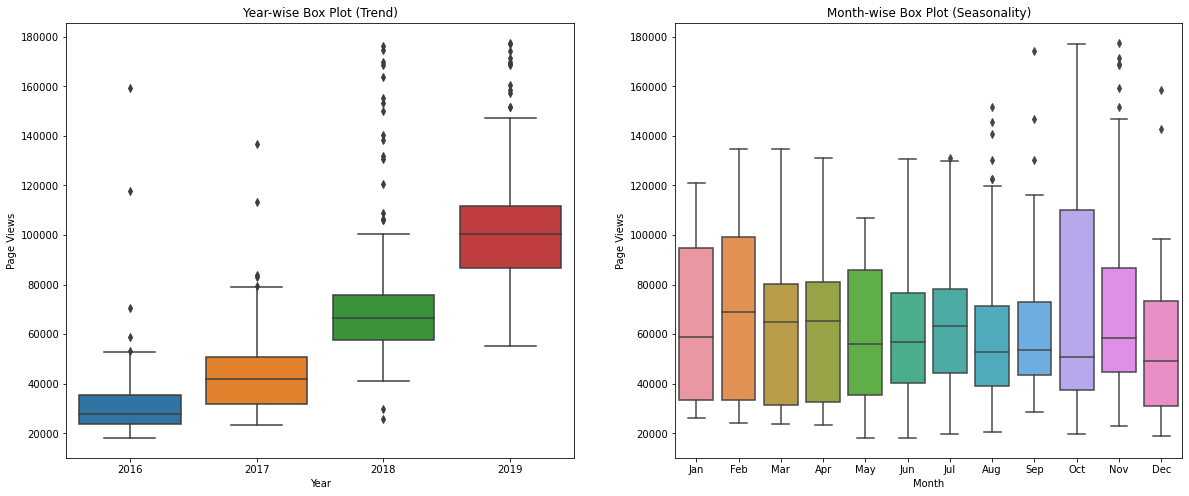

In [2]:
draw_box_plot()

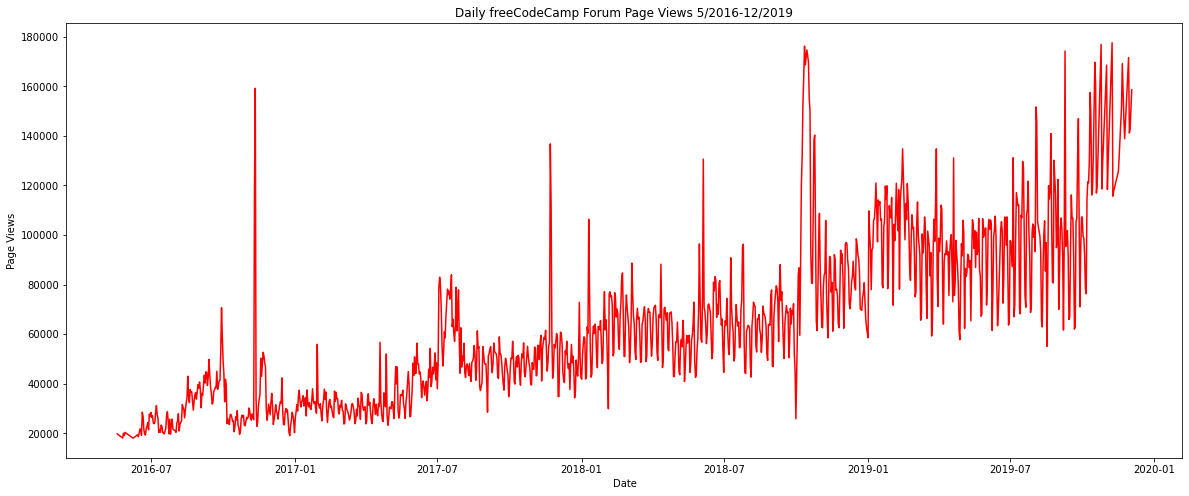

In [3]:
draw_line_plot()

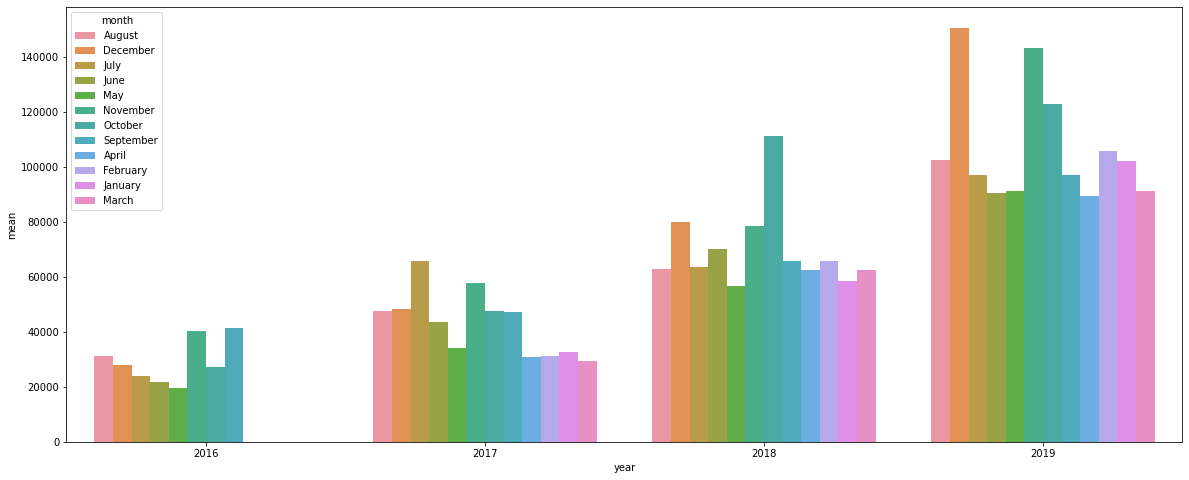

In [4]:
draw_bar_plot()